In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np
from PIL import Image
from PIL import ImageDraw 

root = 'Original_test_image'
sub1 = 'VIS'
sub2 = 'IR'    


In [3]:
def make_dataset(root: str, sub1: str, sub2: str) -> list:
    """Reads a directory with data.
    Returns a dataset as a list of tuples of paired image paths: (rgb_path, gt_path)
    """
    dataset = []

    # Our dir names
    # vis_dir = 'trainimg'
    # ir_dir = 'trainimgr'   
    

    # Get all the filenames from RGB folder
    vis_fnames = sorted(os.listdir(os.path.join(root, sub1)))
    
    # Compare file names from GT folder to file names from RGB:
    for ir_fname in sorted(os.listdir(os.path.join(root, sub2))):

            if ir_fname in vis_fnames:
                # if we have a match - create pair of full path to the corresponding images
                vis_path = os.path.join(root, sub1, ir_fname)
                ir_path = os.path.join(root, sub2, ir_fname)

                item = (vis_path, ir_path)
                # append to the list dataset
                dataset.append(item)
            else:
                continue

    return dataset

In [4]:
from torchvision.datasets.folder import make_dataset as make_dataset_original


# dataset_original = make_dataset_original(root, {sub1: 0, sub2: 1}, extensions='png')
dataset = make_dataset(root, sub1, sub2)

# print('Original make_dataset:')
# print(*dataset_original, sep='\n')

print('Our make_dataset:')
print(*dataset, sep='\n')

Our make_dataset:
('Original_test_image/VIS/1.png', 'Original_test_image/IR/1.png')
('Original_test_image/VIS/10.png', 'Original_test_image/IR/10.png')
('Original_test_image/VIS/11.png', 'Original_test_image/IR/11.png')
('Original_test_image/VIS/12.png', 'Original_test_image/IR/12.png')
('Original_test_image/VIS/13.png', 'Original_test_image/IR/13.png')
('Original_test_image/VIS/14.png', 'Original_test_image/IR/14.png')
('Original_test_image/VIS/15.png', 'Original_test_image/IR/15.png')
('Original_test_image/VIS/16.png', 'Original_test_image/IR/16.png')
('Original_test_image/VIS/17.png', 'Original_test_image/IR/17.png')
('Original_test_image/VIS/18.png', 'Original_test_image/IR/18.png')
('Original_test_image/VIS/19.png', 'Original_test_image/IR/19.png')
('Original_test_image/VIS/2.png', 'Original_test_image/IR/2.png')
('Original_test_image/VIS/20.png', 'Original_test_image/IR/20.png')
('Original_test_image/VIS/21.png', 'Original_test_image/IR/21.png')
('Original_test_image/VIS/3.png', 

In [5]:
from torchvision.datasets.folder import default_loader
from torchvision.datasets.vision import VisionDataset
from torchvision import transforms
from pathlib import Path  


class CustomVisionDataset(VisionDataset):
    
    def __init__(self,
                 root,
                 subfolder1,
                 subfolder2,
                 loader=default_loader):
        super().__init__(root)

        # Prepare dataset
        samples = make_dataset(self.root, subfolder1, subfolder2)

        self.loader = loader
        self.samples = samples
        # list of RGB images
        self.vis_samples = [s[1] for s in samples]
        # list of GT images
        self.ir_samples = [s[1] for s in samples]
        
        self.transform = transforms.Compose([
#             transforms.CenterCrop((512,640)),
            transforms.Resize((256,256)),
            transforms.ToTensor(),
        ])


    def __getitem__(self, index):
        """Returns a data sample from our dataset.
        """
        # getting our paths to images
        vis_path, ir_path = self.samples[index]
        
        # import each image using loader (by default it's PIL)
        vis_sample = self.loader(vis_path)
        ir_sample = self.loader(ir_path)
        
#         vis_sample = vis_sample.convert('L')
        ir_sample = ir_sample.convert('L')
        ir_sample = np.stack((ir_sample,)*3, axis=-1)
        ir_sample = Image.fromarray(ir_sample.astype('uint8'))
        
        # here goes tranforms if needed
        # maybe we need different tranforms for each type of image
        vis_sample = self.transform(vis_sample)
        ir_sample = self.transform(ir_sample)
        
        #get name for sure
        vis_name = Path(vis_path).name
        ir_name = Path(ir_path).name

        # now we return the right imported pair of images (tensors)
        return vis_sample, ir_sample, vis_name, ir_name

    def __len__(self):
        return len(self.samples)

batch 1:
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
3.png
3.png


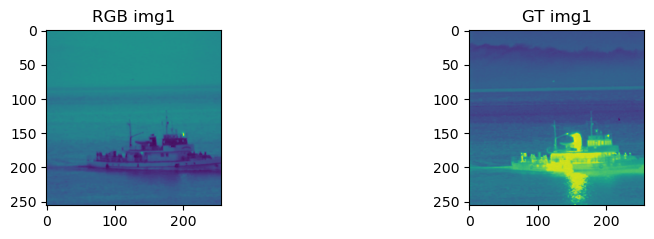

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
16.png
16.png


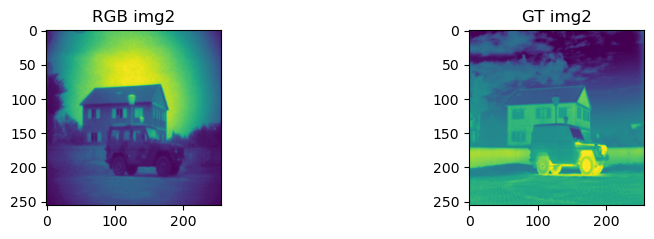

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
14.png
14.png


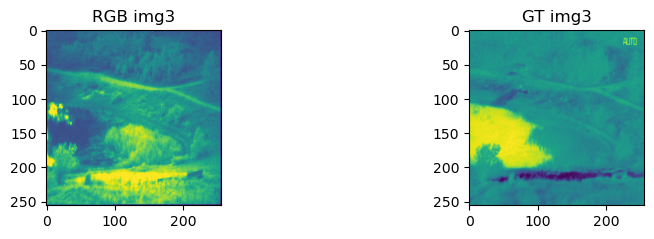

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
1.png
1.png


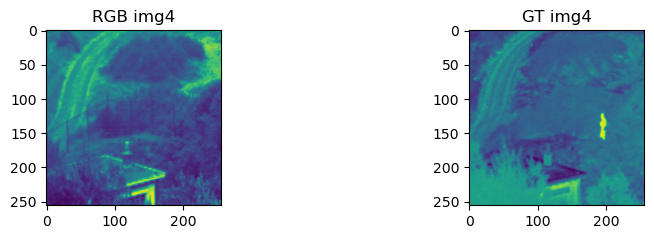

batch 2:
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
12.png
12.png


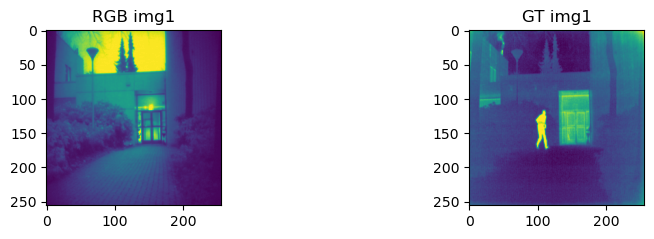

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
5.png
5.png


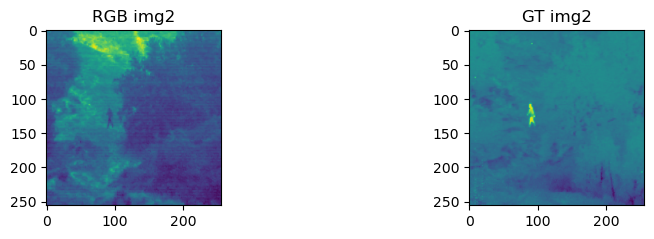

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
21.png
21.png


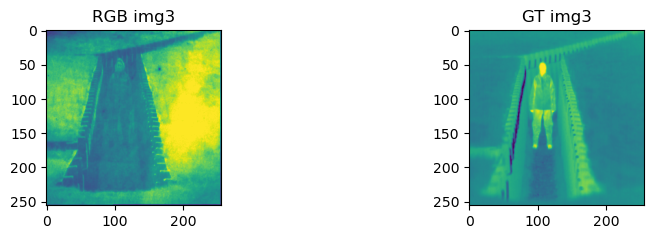

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
2.png
2.png


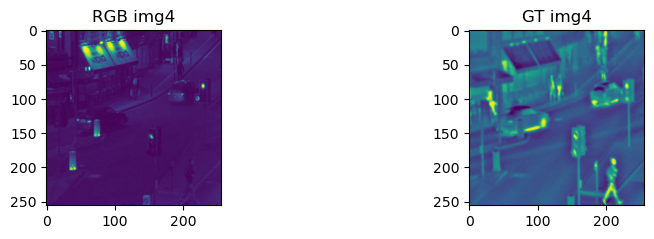

batch 3:
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
20.png
20.png


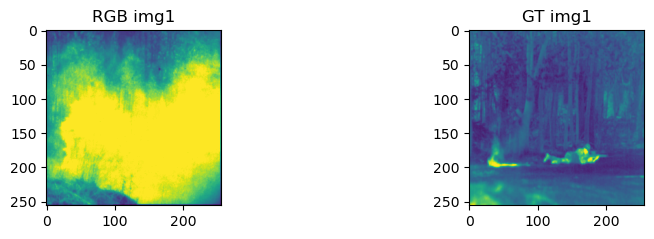

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
8.png
8.png


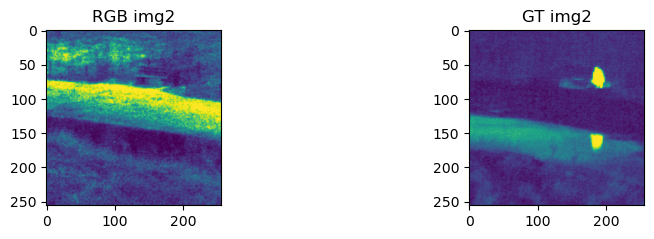

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
6.png
6.png


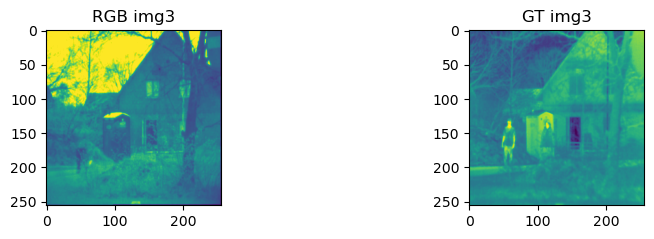

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
11.png
11.png


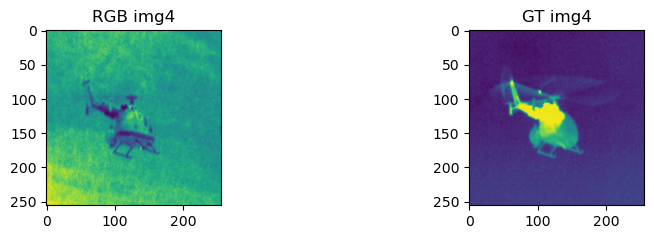

batch 4:
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
18.png
18.png


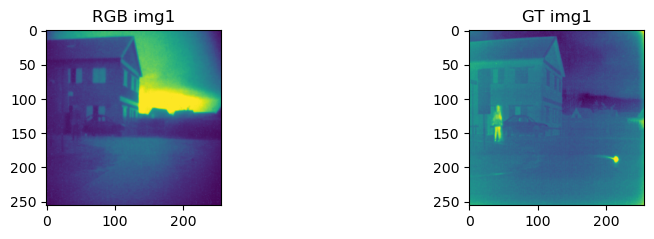

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
19.png
19.png


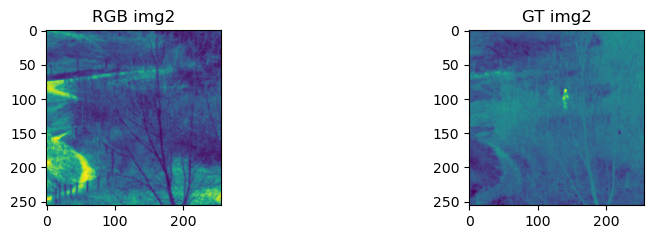

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
9.png
9.png


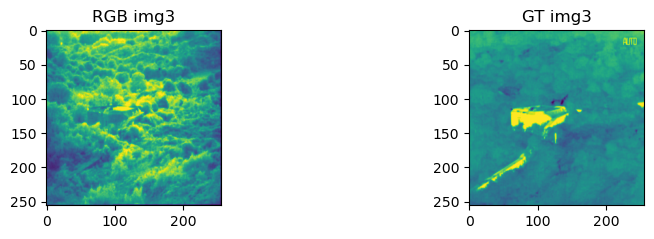

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
15.png
15.png


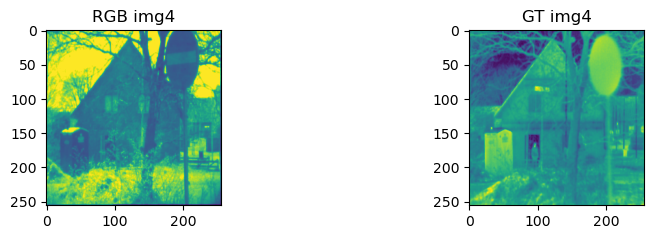

batch 5:
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
7.png
7.png


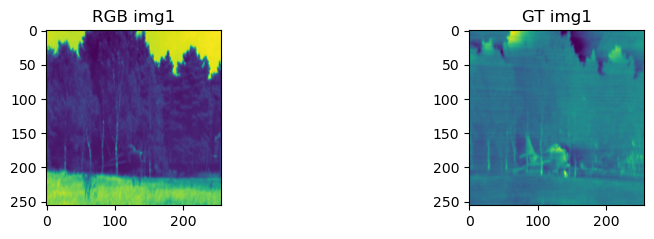

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
13.png
13.png


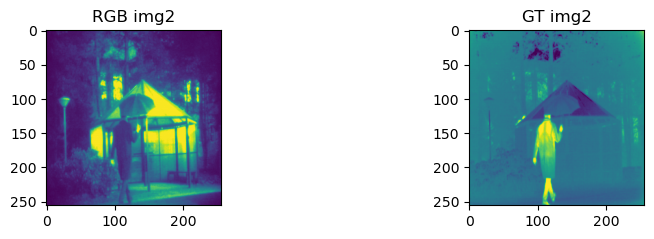

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
10.png
10.png


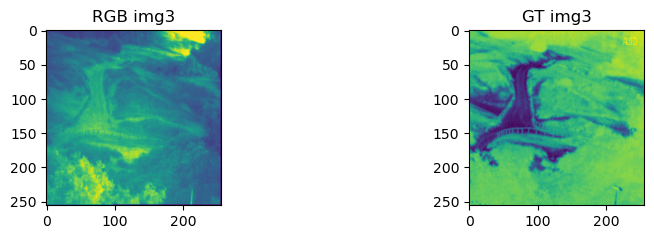

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
4.png
4.png


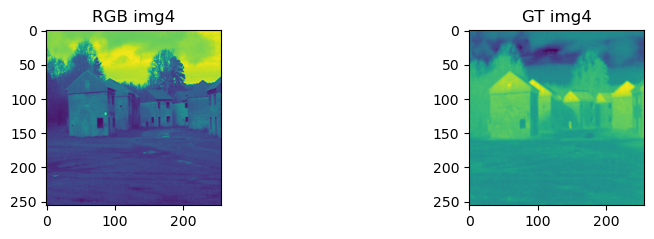

batch 6:
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
17.png
17.png


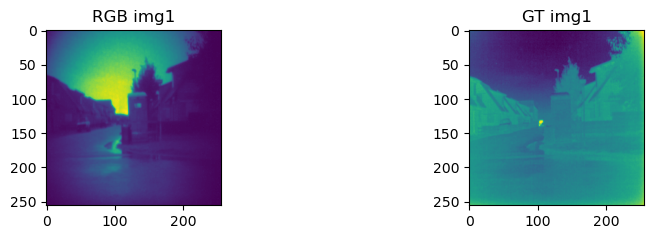

IndexError: index 1 is out of bounds for dimension 0 with size 1

In [6]:
from torch.utils.data import DataLoader

from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


bs=4 # batch size
# transforms = ToTensor()  # we need this to convert PIL images to Tensor
shuffle = True

dataset = CustomVisionDataset(root, sub1, sub2)
dataloader = DataLoader(dataset, batch_size=bs, shuffle=shuffle)

for i, (rgb, gt, rp, gtp) in enumerate(dataloader):
    print(f'batch {i+1}:')
    # some plots
    for i in range(bs):
        print(rgb[i].shape)
        print(gt[i].shape)
        print(rp[i])
        print(gtp[i])
        
        plt.figure(figsize=(10, 5))
        plt.subplot(221)
        plt.imshow(rgb[i][0])
        plt.title(f'RGB img{i+1}')
        plt.subplot(222)
        plt.imshow(gt[i][0])
        plt.title(f'GT img{i+1}')
        plt.show()